In [1]:
from scipy.io import loadmat

import matplotlib.pyplot as plt
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from mne.decoding import CSP
from mne.filter import filter_data

import geneticalgorithm.geneticalgorithm as gal


In [2]:
def fitness(X):
    if np.sum(X)>= 2:
        X = np.array(X, dtype=bool)
        ft1 = ft[yt==1]
        S1 = np.cov(ft1[:, X], rowvar=False)
        ft2 = ft[yt==0]
        S2 = np.cov(ft2[:, X], rowvar=False)
        miu0 = np.average(ft[:, X], axis=0)
        miu1 = np.average(ft1[:, X], axis=0)
        miu2 = np.average(ft2[:, X], axis=0)

        Sb= (miu1-miu0)[:, np.newaxis]@np.transpose((miu1-miu0)[:, np.newaxis]) + (miu2-miu0)[:, np.newaxis]@np.transpose((miu2-miu0)[:, np.newaxis])

        return -np.trace(Sb)/np.trace(S1+S2)*np.sqrt(np.sum(X))
    else:
        return 100


In [3]:
#Data acquisition
eeg_data = loadmat('All_data.mat')
chan = eeg_data.get('clab')[0]
x_test = eeg_data.get('x_test')
x_train = eeg_data.get('x_train')
y = eeg_data.get('y_train')[0]
channal_names = []
for array in chan:
    channal_names.append(array[0])
channal_names = np.array(channal_names)
x = np.moveaxis(x_train, (0,1,2), (2,1,0)) #(trial, channal, time)
x_t = np.moveaxis(x_test, (0,1,2), (2,1,0))

In [25]:
xt, xs, yt, ys = train_test_split(x, y, train_size=0.85, random_state=1) #splitting the dataset

In [26]:
#filtering the data into low, mid, and high band
xt_low = filter_data(xt, 100, l_freq=2, h_freq = 8, verbose='CRITICAL')
xt_mid = filter_data(xt, 100, 8, 15, verbose='CRITICAL')
xt_high = filter_data(xt, 100, 15, 30, verbose='CRITICAL')

xs_low = filter_data(xs, 100, l_freq=2, h_freq = 8, verbose='CRITICAL')
xs_mid = filter_data(xs, 100, 8, 15, verbose='CRITICAL')
xs_high = filter_data(xs, 100, 15, 30, verbose='CRITICAL')

x_test_low = filter_data(x_t, 100, l_freq=2, h_freq = 8, verbose='CRITICAL')
x_test_mid = filter_data(x_t, 100, 8, 15, verbose='CRITICAL')
x_test_high = filter_data(x_t, 100, 15, 30, verbose='CRITICAL')

In [27]:
#defining the processor pipelines
pipe = Pipeline([('csp', CSP(n_components=4, reg=None, log=True, norm_trace=False)), ('nn', MLPClassifier((5, 3, 2), max_iter=50000, activation="tanh", random_state=0, alpha=0.001))])
rbfpipe = Pipeline([('csp', CSP(n_components=4, reg=None, log=True, norm_trace=False)), ('rbf', SVC(C=0.1, kernel = 'rbf'))])

In [28]:
#cross-valuation results for MLP
cross_val = cross_val_score(pipe, xt_high, yt)
print(cross_val, np.average(cross_val))

Computing rank from data with rank=None
    Using tolerance 7.5 (2.2e-16 eps * 28 dim * 1.2e+15  max singular value)
    Estimated rank (mag): 28
    MAG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.6 (2.2e-16 eps * 28 dim * 1.2e+15  max singular value)
    Estimated rank (mag): 28
    MAG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.6 (2.2e-16 eps * 28 dim * 1.2e+15  max singular value)
    Estimated rank (mag): 28
    MAG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.5 (2.2e-16 eps * 28 dim * 1.2e+15  max singular value)
    Estimated ra

In [29]:
#test data set result for MLP
pipe.fit(xt_high, yt)
pipe.score(xs_high, ys)

Computing rank from data with rank=None
    Using tolerance 8.5 (2.2e-16 eps * 28 dim * 1.4e+15  max singular value)
    Estimated rank (mag): 28
    MAG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.4 (2.2e-16 eps * 28 dim * 1.3e+15  max singular value)
    Estimated rank (mag): 28
    MAG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.


0.8333333333333334

In [30]:
#cross-valuation results for RBF
cross_val = cross_val_score(rbfpipe, xt_high, yt)
print(cross_val, np.average(cross_val))

Computing rank from data with rank=None
    Using tolerance 7.5 (2.2e-16 eps * 28 dim * 1.2e+15  max singular value)
    Estimated rank (mag): 28
    MAG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.6 (2.2e-16 eps * 28 dim * 1.2e+15  max singular value)
    Estimated rank (mag): 28
    MAG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.6 (2.2e-16 eps * 28 dim * 1.2e+15  max singular value)
    Estimated rank (mag): 28
    MAG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 7.5 (2.2e-16 eps * 28 dim * 1.2e+15  max singular value)
    Estimated ra

In [31]:
#Test data results for RBF
rbfpipe.fit(xt_high, yt)
rbfpipe.score(xs_high, ys)

Computing rank from data with rank=None
    Using tolerance 8.5 (2.2e-16 eps * 28 dim * 1.4e+15  max singular value)
    Estimated rank (mag): 28
    MAG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.4 (2.2e-16 eps * 28 dim * 1.3e+15  max singular value)
    Estimated rank (mag): 28
    MAG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.


0.8541666666666666

In [32]:
#confusion matrix for the test data (MLP)
confusion_matrix(ys, pipe.predict(xs_high))

array([[22,  1],
       [ 7, 18]], dtype=int64)

In [33]:
#RBF predictions
rbfpipe.predict(x_test_high)

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=uint8)

In [34]:
#MLP predictions
pipe.predict(x_test_high)

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=uint8)

In [21]:
#Activation channels (for viewing the suppression, change the equality)
channal_names[pipe.named_steps['csp'].patterns_[0]>0.8] #Channel suppression and activation patterns 

array(['C5', 'C3', 'C1', 'CP5', 'CP3', 'CP1', 'CPz', 'O1'], dtype='<U3')

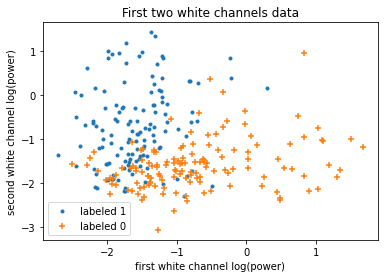

In [43]:
plt.scatter(pipe.named_steps['csp'].transform(xt_high)[yt==1][:,0], pipe.named_steps['csp'].transform(xt_high)[yt==1][:,1], marker='.')
plt.scatter(pipe.named_steps['csp'].transform(xt_high)[yt==0][:,0], pipe.named_steps['csp'].transform(xt_high)[yt==0][:,1], marker='+')
plt.xlabel("first white channel log(power)")
plt.ylabel("second white channel log(power)")
plt.title('First two white channels data')
plt.legend(["labeled 1", "labeled 0"])
plt.show()


In [35]:
#building csp parameters
csp_high = CSP(n_components=4, reg=None, transform_into='csp_space')
#fitting it to the test data
zt_high = csp_high.fit_transform(xt_high, yt)
#applying it to test data and the ulabeled signals
zs_high = csp_high.transform(xs_high)
z_test_high = csp_high.transform(x_test_high)

csp_mid = CSP(n_components=4, reg=None, transform_into='csp_space')
zt_mid = csp_mid.fit_transform(xt_mid, yt)
zs_mid = csp_mid.transform(xs_mid)
z_test_mid = csp_mid.transform(x_test_mid)

Computing rank from data with rank=None
    Using tolerance 8.5 (2.2e-16 eps * 28 dim * 1.4e+15  max singular value)
    Estimated rank (mag): 28
    MAG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 8.4 (2.2e-16 eps * 28 dim * 1.3e+15  max singular value)
    Estimated rank (mag): 28
    MAG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 13 (2.2e-16 eps * 28 dim * 2.1e+15  max singular value)
    Estimated rank (mag): 28
    MAG: rank 28 computed from 28 data channels with 0 projectors
Reducing data rank from 28 -> 28
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 11 (2.2e-16 eps * 28 dim * 1.8e+15  max singular value)
    Estimated rank

In [36]:
zt_high_power = np.log(np.sum(zt_high**2, axis=2)) #log power features
zt_mid_power = np.log(np.sum(zt_mid**2, axis=2))

zs_high_power = np.log(np.sum(zs_high**2, axis=2)) #log power features
zs_mid_power = np.log(np.sum(zs_mid**2, axis=2))

z_test_high_power = np.log(np.sum(z_test_high**2, axis=2)) #log power features
z_test_mid_power = np.log(np.sum(z_test_mid**2, axis=2))


In [37]:
zt_high_skew = np.sum(zt_high**3, axis=2) #skew features
zt_mid_skew = np.sum(zt_mid**3, axis=2)

zs_high_skew = np.sum(zs_high**3, axis=2) #skew features
zs_mid_skew = np.sum(zs_mid**3, axis=2)

z_test_high_skew = np.sum(z_test_high**3, axis=2) #skew features
z_test_mid_skew = np.sum(z_test_mid**3, axis=2)

In [38]:
zt_high_kurt = np.sum(zt_high**4, axis=2) #kurtosis features
zt_mid_kurt = np.sum(zt_mid**4, axis=2)

zs_high_kurt = np.sum(zs_high**4, axis=2) #kurtosis features
zs_mid_kurt = np.sum(zs_mid**4, axis=2)

z_test_high_kurt = np.sum(z_test_high**4, axis=2) #kurtosis features
z_test_mid_kurt = np.sum(z_test_mid**4, axis=2)

In [39]:
zt_high_max = np.max(np.abs(zt_high), axis=2) #maximum amplitude
zt_mid_max = np.max(np.abs(zt_mid), axis=2)

zs_high_max = np.max(np.abs(zs_high), axis=2) #maximum amplitude
zs_mid_max = np.max(np.abs(zs_mid), axis=2)

z_test_high_max = np.max(np.abs(z_test_high), axis=2) #maximum amplitude
z_test_mid_max = np.max(np.abs(z_test_mid), axis=2)

In [40]:
zt_high_dot = zt_high[:,:,1:] - zt_high[:,:,:-1] #derivative log power
zt_high_dot_power = np.log(np.sum(zt_high_dot**2, axis=2))

zt_mid_dot = zt_mid[:,:,1:] - zt_mid[:,:,:-1] #derivative log power
zt_mid_dot_power = np.log(np.sum(zt_mid_dot**2, axis=2))

zs_high_dot = zs_high[:,:,1:] - zs_high[:,:,:-1] #derivative log power
zs_high_dot_power = np.log(np.sum(zs_high_dot**2, axis=2))

zs_mid_dot = zs_mid[:,:,1:] - zs_mid[:,:,:-1] #derivative log power
zs_mid_dot_power = np.log(np.sum(zs_mid_dot**2, axis=2))

z_test_high_dot = z_test_high[:,:,1:] - z_test_high[:,:,:-1] #derivative log power
z_test_high_dot_power = np.log(np.sum(z_test_high_dot**2, axis=2))

z_test_mid_dot = z_test_mid[:,:,1:] - z_test_mid[:,:,:-1] #derivative log power
z_test_mid_dot_power = np.log(np.sum(z_test_mid_dot**2, axis=2))

In [41]:
#putting them all together
ft = np.concatenate((zt_high_power, zt_mid_power, zt_high_skew, zt_mid_skew, zt_high_kurt, zt_mid_kurt, zt_high_max, zt_mid_max, zt_high_dot_power, zt_mid_dot_power), axis=1)
fs = np.concatenate((zs_high_power, zs_mid_power, zs_high_skew, zs_mid_skew, zs_high_kurt, zs_mid_kurt, zs_high_max, zs_mid_max, zs_high_dot_power, zs_mid_dot_power), axis=1)
f_test = np.concatenate((z_test_high_power, z_test_mid_power, z_test_high_skew, z_test_mid_skew, z_test_high_kurt, z_test_mid_kurt, z_test_high_max, z_test_mid_max, z_test_high_dot_power, z_test_mid_dot_power), axis=1)

 The best solution found:                                                                           
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

 Objective function:
 -1.022872594086543


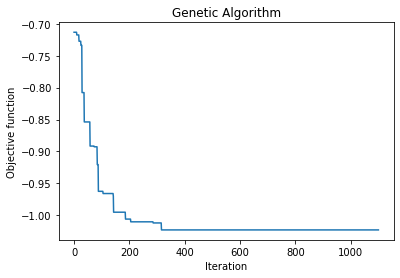

In [285]:
### Genetic Algorithm
algorithm_param = {'max_num_iteration': 1100,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model = gal(function=fitness, dimension=40, variable_type='bool', algorithm_parameters=algorithm_param)
model.run()

In [42]:
#aving the gene coresponding to best features
X = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,], dtype=bool)
#slicing the data to include only the best features
ft_selected = ft[:,X]
fs_selected = fs[:,X]
f_test_selected = f_test[:,X]

In [43]:
#building the pipeline for best features
full_pipe = Pipeline([('pca', PCA(20)),('nn', MLPClassifier((15, 5, 2), max_iter=50000, activation="tanh", random_state=0))])
rbf_full_pipe = Pipeline([('pca', PCA(20)),('rbf', SVC(C=0.5, kernel = 'rbf'))])

In [44]:
#MLP cross-validation results
cross_val = cross_val_score(full_pipe, ft_selected, yt)
print(cross_val, np.average(cross_val))

[0.88888889 0.88888889 0.92592593 0.88679245 0.88679245] 0.8954577218728161


In [45]:
#MLP test data score
full_pipe.fit(ft_selected, yt)
full_pipe.score(fs_selected, ys)

0.875

In [46]:
#MLP predictions for unlabeled data
full_pipe.predict(f_test_selected)

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=uint8)

In [47]:
#RBF cross-validation results
cross_val = cross_val_score(rbf_full_pipe, ft_selected, yt)
print(cross_val, np.average(cross_val))

[0.90740741 0.88888889 0.92592593 0.86792453 0.83018868] 0.8840670859538784


In [48]:
#RBF on test data
rbf_full_pipe.fit(ft_selected, yt)
rbf_full_pipe.score(fs_selected, ys)

0.8541666666666666

In [49]:
#RBF predictions for unlabeld data
rbf_full_pipe.predict(f_test_selected)

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=uint8)